In [1]:
import pandas as pd 

df = pd.read_csv("data.csv").T
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.head(8)



User,u1,u2,u3,u4,u5,u6,u7,u8,u9,u10,u11,u12,u13
0,06/08/2020 07:39,06/08/2020 12:18,06/08/2020 12:31,06/08/2020 14:23,06/08/2020 21:14,06/08/2020 21:14,07/08/2020 08:04,07/08/2020 08:29,08/08/2020 06:51,08/08/2020 18:56,09/08/2020 08:20,09/08/2020 11:05,17/08/2020 07:48
1,06/08/2020 07:39,06/08/2020 12:18,06/08/2020 12:31,06/08/2020 14:23,06/08/2020 21:14,06/08/2020 21:15,07/08/2020 08:04,07/08/2020 11:59,08/08/2020 06:51,08/08/2020 18:56,09/08/2020 08:20,09/08/2020 11:06,17/08/2020 07:48
2,06/08/2020 07:39,06/08/2020 12:18,06/08/2020 12:31,06/08/2020 14:24,06/08/2020 21:14,06/08/2020 21:15,07/08/2020 08:04,07/08/2020 11:59,08/08/2020 06:51,08/08/2020 18:56,09/08/2020 08:20,09/08/2020 11:07,17/08/2020 07:49
3,06/08/2020 07:39,06/08/2020 12:18,06/08/2020 12:32,06/08/2020 14:24,06/08/2020 21:15,06/08/2020 21:15,07/08/2020 08:05,07/08/2020 11:59,08/08/2020 06:51,08/08/2020 18:56,09/08/2020 08:21,09/08/2020 11:07,17/08/2020 07:49
4,06/08/2020 07:39,06/08/2020 12:18,06/08/2020 12:32,06/08/2020 14:24,06/08/2020 21:15,06/08/2020 21:15,07/08/2020 08:05,07/08/2020 11:59,08/08/2020 06:51,08/08/2020 18:56,09/08/2020 08:21,09/08/2020 11:09,17/08/2020 07:49
5,06/08/2020 07:39,06/08/2020 12:19,06/08/2020 12:32,06/08/2020 14:24,06/08/2020 21:15,06/08/2020 21:15,07/08/2020 08:05,11/08/2020 08:38,08/08/2020 06:51,08/08/2020 18:56,09/08/2020 08:21,09/08/2020 11:09,17/08/2020 07:49
6,06/08/2020 07:39,06/08/2020 12:19,06/08/2020 12:32,06/08/2020 14:25,06/08/2020 21:16,06/08/2020 21:16,07/08/2020 08:05,11/08/2020 08:38,08/08/2020 06:52,08/08/2020 18:57,09/08/2020 08:21,09/08/2020 11:10,17/08/2020 07:49
7,06/08/2020 07:39,06/08/2020 12:19,06/08/2020 12:32,06/08/2020 14:25,06/08/2020 21:16,06/08/2020 21:16,07/08/2020 08:05,11/08/2020 16:50,08/08/2020 06:52,08/08/2020 18:57,09/08/2020 08:21,09/08/2020 11:10,17/08/2020 07:49


In [2]:
dfbyUserDate = pd.DataFrame()
dfbyUserTime = pd.DataFrame()
for user in df.columns:
    dfbyUserDate[user] = pd.to_datetime(df[user],format ="%d/%m/%Y %H:%M").dt.strftime("%Y-%m-%d")
    dfbyUserTime[user] = pd.to_datetime(df[user],format ="%d/%m/%Y %H:%M").dt.strftime("%H.%M")  

In [3]:
df_good = pd.DataFrame(columns=['id','date','time'])

offs=0
for us in df.columns:
    l1=pd.to_datetime(dfbyUserDate[us].dropna())
    l2=pd.to_numeric(dfbyUserTime[us].dropna())

    for indx in range(0,len(l1)):
        df_good.loc[indx+offs]=[us,l1[indx],l2[indx]]

    offs=offs+len(l1)


<Figure size 432x288 with 0 Axes>

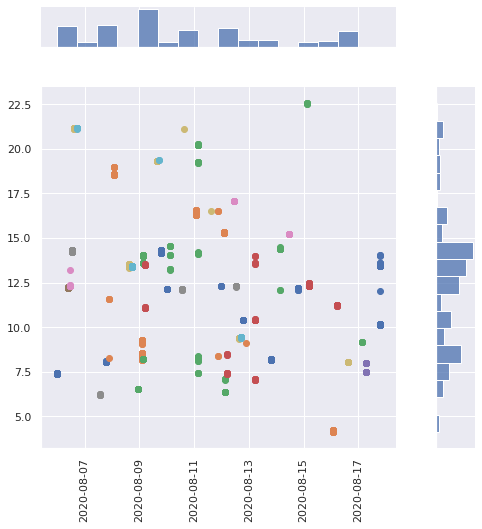

In [7]:
import seaborn as sns
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt


plt.figure()
sns.set()
df_good.sort_values('date')

groups = df_good.groupby(['id'])

ax=sns.jointplot(x="date", y="time",data=df_good, dropna=True, size=7,space=1)

#Clear the axes containing the scatter plot
ax.ax_joint.cla()
shift=0
h=[0,2,3,5,7,9,11,13,15,17,19,21,23]
for name, group in groups:
    
    for idx in range(len(group["date"])):
        group['date'].iloc[idx]=group['date'].iloc[idx].replace(hour=h[shift], minute=shift, second=shift*2)
    
    shift=shift+1
    ax.ax_joint.scatter(group["date"], group["time"])

for tick in ax.ax_joint.get_xticklabels():         
    tick.set_rotation(90)
